# Working On Wines Dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

dataset = pd.read_csv("datasets/winequality_red.csv")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#renaming the columns

dataset.rename(columns ={'fixed acidity':'FA','volatile acidity':'VA','citric acid':'CA','residual sugar':'RS','chlorides':'chlorides','free sulfur dioxide':'FSD','total sulfur dioxide':'TSD','density':'density'},inplace=True)

In [5]:
# checking the column names

dataset.head()

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# exploring the shape of the dataset
dataset.shape

(1599, 12)

In [7]:
# checking for the missing data

dataset.isnull().sum()

FA           0
VA           0
CA           0
RS           0
chlorides    0
FSD          0
TSD          0
density      0
pH           0
sulphates    0
alcohol      0
quality      0
dtype: int64

In [8]:
# so we don't have any null values

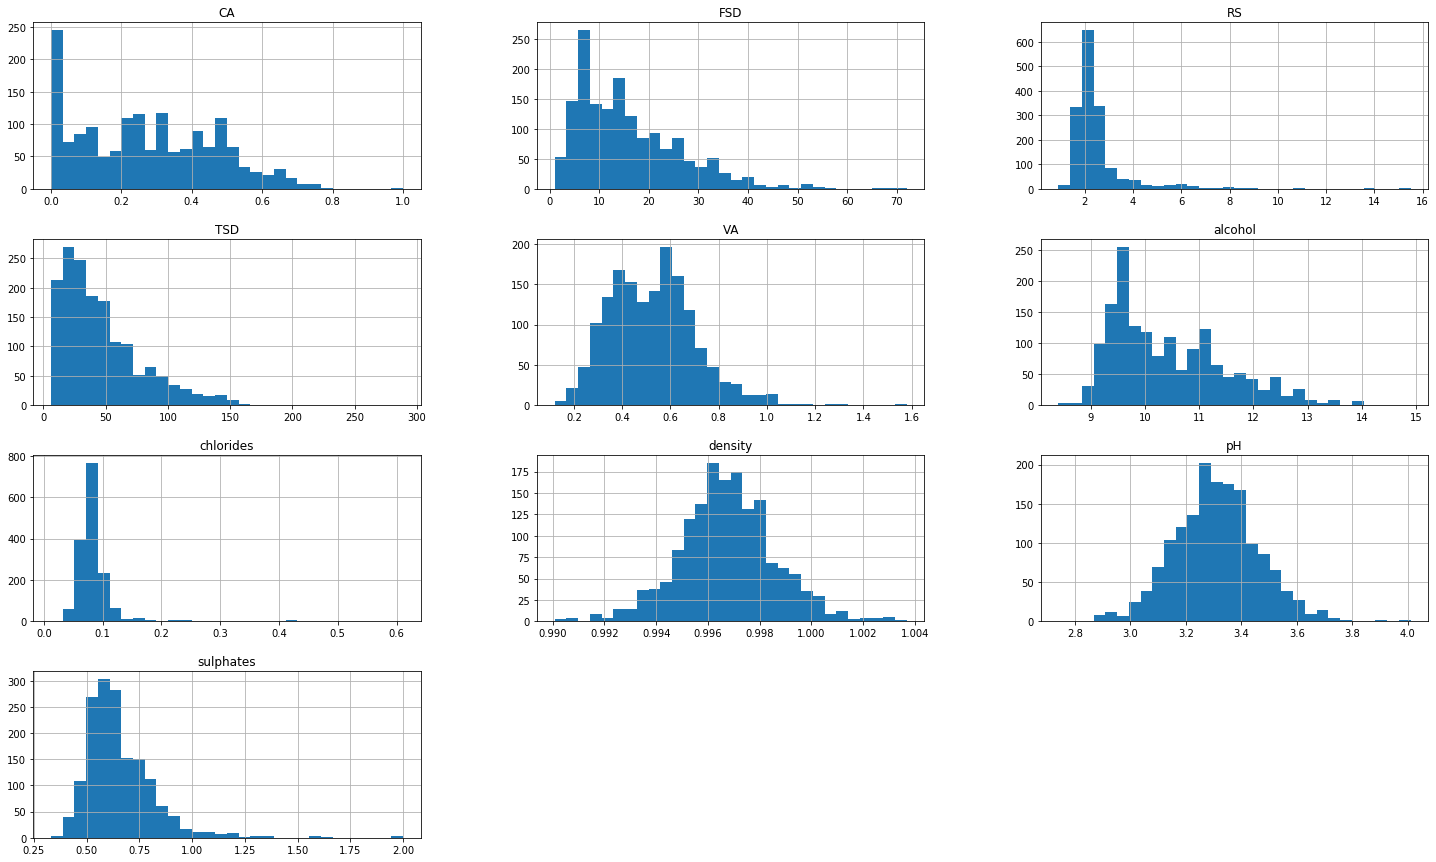

In [9]:
#checking for the 0 values
dataset.iloc[:,1:-1].hist(bins=30,figsize=(25,15))
plt.show()

In [10]:
# now we will see in terms of values
dataset.iloc[:,1:-1].isin([0]).sum()

VA             0
CA           132
RS             0
chlorides      0
FSD            0
TSD            0
density        0
pH             0
sulphates      0
alcohol        0
dtype: int64

In [11]:
dataset.iloc[:,:-1].describe()

,FA,VA,CA,RS,chlorides,FSD,TSD,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [12]:
# replacing 0 values with median value in CA

In [13]:
dataset['CA'] = dataset['CA'].replace({0:dataset['CA'].median()})

In [14]:
# now we will see in terms of values
dataset.iloc[:,1:-1].isin([0]).sum()

VA           0
CA           0
RS           0
chlorides    0
FSD          0
TSD          0
density      0
pH           0
sulphates    0
alcohol      0
dtype: int64

In [15]:
# Now all 0s are replaced by the median values

In [16]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier

In [17]:
x =dataset.iloc[:,:-1].values

y =dataset.quality.values

In [18]:
x.shape

(1599, 11)

In [19]:
y.shape

(1599,)

In [20]:
rf = RandomForestClassifier(n_estimators=20,random_state=11)

In [21]:
rf.fit(x,y)

RandomForestClassifier(n_estimators=20, random_state=11)

In [22]:
f = rf.feature_importances_

In [23]:
for c,k in zip(dataset.columns[:-1],f):
    print(c," <__> ",k)

FA  <__>  0.07560476372174177
VA  <__>  0.1061277460779753
CA  <__>  0.0782818671249306
RS  <__>  0.06424808824895825
chlorides  <__>  0.07976306720631346
FSD  <__>  0.06260978831254287
TSD  <__>  0.10599595951070562
density  <__>  0.09477993930632014
pH  <__>  0.07584246544080342
sulphates  <__>  0.11500868245468732
alcohol  <__>  0.14173763259502128


In [24]:
dataset_new = dataset[['alcohol','sulphates','TSD','VA','density','chlorides','pH','CA','FA']]

In [25]:
dataset_new.head()

,alcohol,sulphates,TSD,VA,density,chlorides,pH,CA,FA
0,9.4,0.56,34.0,0.70,0.9978,0.076,3.51,0.26,7.4
1,9.8,0.68,67.0,0.88,0.9968,0.098,3.20,0.26,7.8
2,9.8,0.65,54.0,0.76,0.9970,0.092,3.26,0.04,7.8
3,9.8,0.58,60.0,0.28,0.9980,0.075,3.16,0.56,11.2
4,9.4,0.56,34.0,0.70,0.9978,0.076,3.51,0.26,7.4


In [26]:
dataset_new.shape

(1599, 9)

In [27]:
# splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(dataset_new.values,dataset.quality.values,test_size=.5,random_state=12)

In [29]:
xtrain.shape

(799, 9)

In [30]:
#feature scaling
from sklearn.preprocessing import StandardScaler
std =StandardScaler()

In [31]:
std_train = std.fit_transform(xtrain)
std_test = std.transform(xtest)

In [32]:
dataset.quality.value_counts().sum()

1599

In [33]:
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [34]:
# logistic regression

In [35]:
log = LogisticRegression(C=10,solver='lbfgs', max_iter=1000)
log.fit(std_train,ytrain)

LogisticRegression(C=10, max_iter=1000)

In [36]:
#score
train_score = log.score(std_train,ytrain)
test_score = log.score(std_test,ytest)

In [37]:
print("The Train Score is : ",train_score)
print("The Test Score is :  ",test_score)

The Train Score is :  0.6020025031289111
The Test Score is :   0.5975


In [38]:
# Lets check with the Linear Regression as well

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model2 = LinearRegression()

In [41]:
model2.fit(std_train,ytrain)

LinearRegression()

In [42]:
#score
train_score = model2.score(std_train,ytrain)
test_score = model2.score(std_test,ytest)

In [43]:
print("The Train Score is : ",train_score)
print("The Test Score is :  ",test_score)

The Train Score is :  0.36437953035705883
The Test Score is :   0.3381489328135726


In [44]:
#so we can clearly see that Logistic Regression is working perfectly here